<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 53.6 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 85.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 78.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 87.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 44.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138890 sha256=64327028eb431acfbda525c06f3e0ea519b5efde8b3e71eeff981aed0a188d7d
  Stored in directory: /home/jupyterlab/.cac

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [86]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title="Gamestop Stock Price",
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [41]:
# Extract historical stock data and save it in a DataFrame
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [44]:
# Reset the index
tesla_data.reset_index(inplace=True)
# Display the first five rows of the DataFrame
print(tesla_data.head())

   index                      Date      Open      High       Low     Close  \
0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [47]:
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

# Print the HTML data
print(html_data[:500]) 


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [53]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'

# Print the parsed HTML (optional)
print(soup.prettify()[:500])  # This will print the formatted HTML

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [11]:
tables = soup.find_all('table')

In [12]:
# Display the number of tables found and the first few tables
print(f"Number of tables found: {len(tables)}")

Number of tables found: 6


In [13]:
# Loop through each table to find the one containing "Tesla Quarterly Revenue"
tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break  # Exit the loop once the relevant table is found


In [55]:
# Optional: Display the found table
if tesla_revenue_table:
    print("Found the Tesla Quarterly Revenue table:")
    print(tesla_revenue_table)
else:
    print("Tesla Quarterly Revenue table not found.")

Found the Tesla Quarterly Revenue table:
<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</t

In [16]:
# Initialize an empty DataFrame with specified columns
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Display the empty DataFrame
print(tesla_revenue)

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [17]:
#  Loop through rows in the relevant table and extract data
if tesla_revenue_table:
    data = []
    for row in tesla_revenue_table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        if len(cols) >= 2:  # Ensure there are at least two columns
            date = cols[0].text.strip()  # Extract date from the first column
            revenue_str = cols[1].text.strip().replace(',', '').replace('$', '')  # Extract revenue from the second column
            
            # Check if revenue_str is not empty before converting to float
            if revenue_str:  # If revenue_str is not empty
                revenue = float(revenue_str)  # Convert to float
            else:
                revenue = 0.0  # Set revenue to 0 if the string is empty
            
            data.append({'Date': date, 'Revenue': revenue})
    
    # Create a new DataFrame from the extracted data
    new_data = pd.DataFrame(data)
    
    # Concatenate the new data with the existing DataFrame
    tesla_revenue = pd.concat([tesla_revenue, new_data], ignore_index=True)

In [18]:
# Display the populated DataFrame
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

In [19]:

# Check the data type of the 'Revenue' column
print(tesla_revenue['Revenue'].dtype)

# If the data type is not string, convert it to string
if tesla_revenue['Revenue'].dtype != object:
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str)

# Clean the Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)

float64


In [20]:

new_date = "2021-01-01"  # Example date
new_revenue = 1000.0      # Example cleaned revenue value

# Add a new row to the DataFrame using loc
tesla_revenue.loc[len(tesla_revenue)] = [new_date, new_revenue]

# Display the updated DataFrame
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  2012-12-31    306.0
40  2012-09-30  

In [21]:
#  Loop through rows in the relevant table and extract data
if tesla_revenue_table:
    for row in tesla_revenue_table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        if len(cols) >= 2:  # Ensure there are at least two columns
            date = cols[0].text.strip()  # Extract date from the first column
            revenue_str = cols[1].text.strip().replace(',', '').replace('$', '')  # Extract revenue from the second column
            
            # Check if revenue_str is not empty before converting to float
            if revenue_str:  # If revenue_str is not empty
                revenue = float(revenue_str)  # Convert to float
            else:
                revenue = 0.0  # Set revenue to 0 if the string is empty
            
            # Add the new row to the DataFrame using loc
            tesla_revenue.loc[len(tesla_revenue)] = [date, revenue]

# Display the populated DataFrame
print(tesla_revenue)

           Date  Revenue
0    2022-09-30  21454.0
1    2022-06-30  16934.0
2    2022-03-31  18756.0
3    2021-12-31  17719.0
4    2021-09-30  13757.0
..          ...      ...
104  2010-06-30     28.0
105  2010-03-31     21.0
106  2009-12-31      0.0
107  2009-09-30     46.0
108  2009-06-30     27.0

[109 rows x 2 columns]


In [22]:
# Increase the display options for rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the populated DataFrame
print(tesla_revenue)

           Date  Revenue
0    2022-09-30  21454.0
1    2022-06-30  16934.0
2    2022-03-31  18756.0
3    2021-12-31  17719.0
4    2021-09-30  13757.0
5    2021-06-30  11958.0
6    2021-03-31  10389.0
7    2020-12-31  10744.0
8    2020-09-30   8771.0
9    2020-06-30   6036.0
10   2020-03-31   5985.0
11   2019-12-31   7384.0
12   2019-09-30   6303.0
13   2019-06-30   6350.0
14   2019-03-31   4541.0
15   2018-12-31   7226.0
16   2018-09-30   6824.0
17   2018-06-30   4002.0
18   2018-03-31   3409.0
19   2017-12-31   3288.0
20   2017-09-30   2985.0
21   2017-06-30   2790.0
22   2017-03-31   2696.0
23   2016-12-31   2285.0
24   2016-09-30   2298.0
25   2016-06-30   1270.0
26   2016-03-31   1147.0
27   2015-12-31   1214.0
28   2015-09-30    937.0
29   2015-06-30    955.0
30   2015-03-31    940.0
31   2014-12-31    957.0
32   2014-09-30    852.0
33   2014-06-30    769.0
34   2014-03-31    621.0
35   2013-12-31    615.0
36   2013-09-30    431.0
37   2013-06-30    405.0
38   2013-03-31    562.0


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [28]:

tesla_revenue["Revenue"].dtype
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [29]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [30]:
tesla_revenue.tail()

,Date,Revenue
104,2010-06-30,28.0
105,2010-03-31,21.0
106,2009-12-31,0.0
107,2009-09-30,46.0
108,2009-06-30,27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [45]:
# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [48]:
# Extract historical stock data for GameStop
gme_data = gme.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [49]:
#  Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

#  Display the first five rows of the DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [57]:


#  Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Use requests to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

#  Display the first 500 characters of the HTML data to verify
print(html_data_2[:500])  # Print the first 500 characters for verification

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [52]:
# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data_2, 'html.parser')  

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [71]:
#  Find the table with GameStop Revenue
# Assuming the table has a specific class or id, you may need to adjust the selector based on the actual HTML structure
table = soup.find('table')

#  Extract the data into a DataFrame
data = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are at least two columns
        date = cols[0].text.strip()  # Extract date from the first column
        revenue_str = cols[1].text.strip().replace(',', '').replace('$', '')

# Clean revenue string
        data.append({"Date": date, "Revenue": revenue_str})

# Create the DataFrame
gme_revenue = pd.DataFrame(data)

# Check the columns of the DataFrame
print("Columns in DataFrame:", gme_revenue.columns)

# Convert Revenue to numeric
#gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Convert Revenue to numeric
if 'Revenue' in gme_revenue.columns:
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
else:
    print("Revenue column not found in DataFrame.")


Columns in DataFrame: Index(['Date', 'Revenue'], dtype='object')


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [72]:
print(gme_revenue)

    Date  Revenue
0   2021    53823
1   2020    31536
2   2019    24578
3   2018    21461
4   2017    11759
5   2016     7000
6   2015     4046
7   2014     3198
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


In [73]:
print(gme_revenue.head())

   Date  Revenue
0  2021    53823
1  2020    31536
2  2019    24578
3  2018    21461
4  2017    11759


In [78]:
gme_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


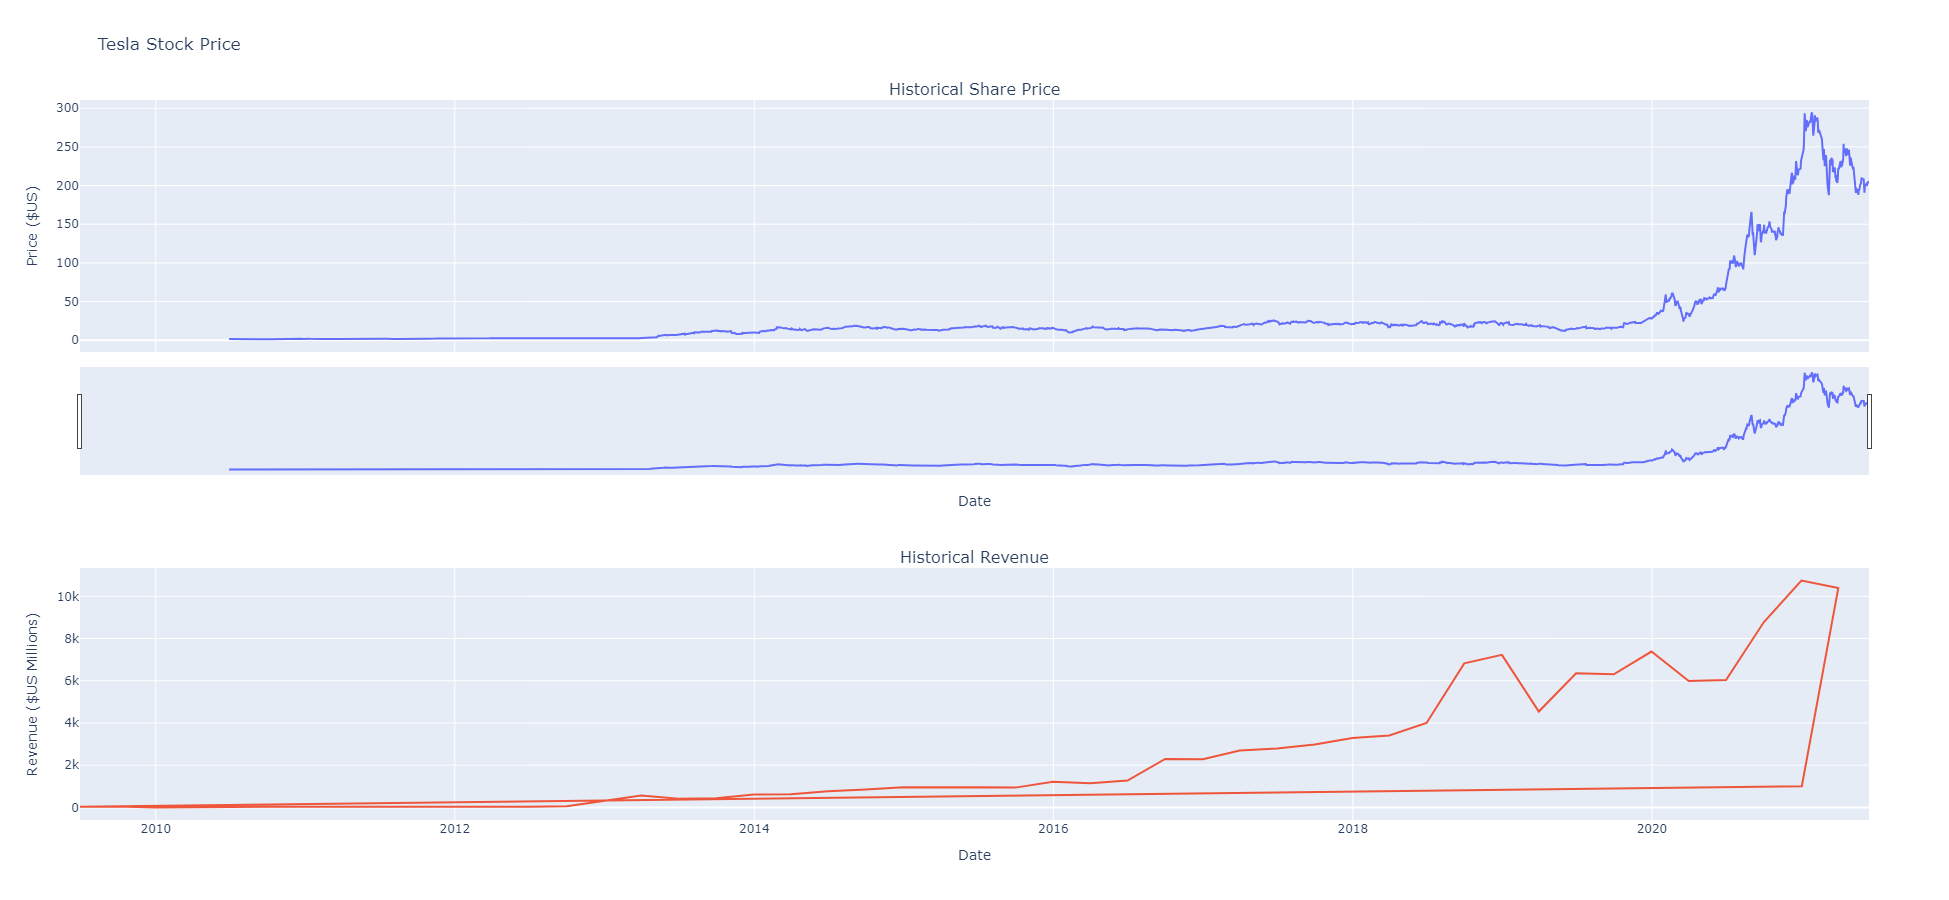

In [84]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


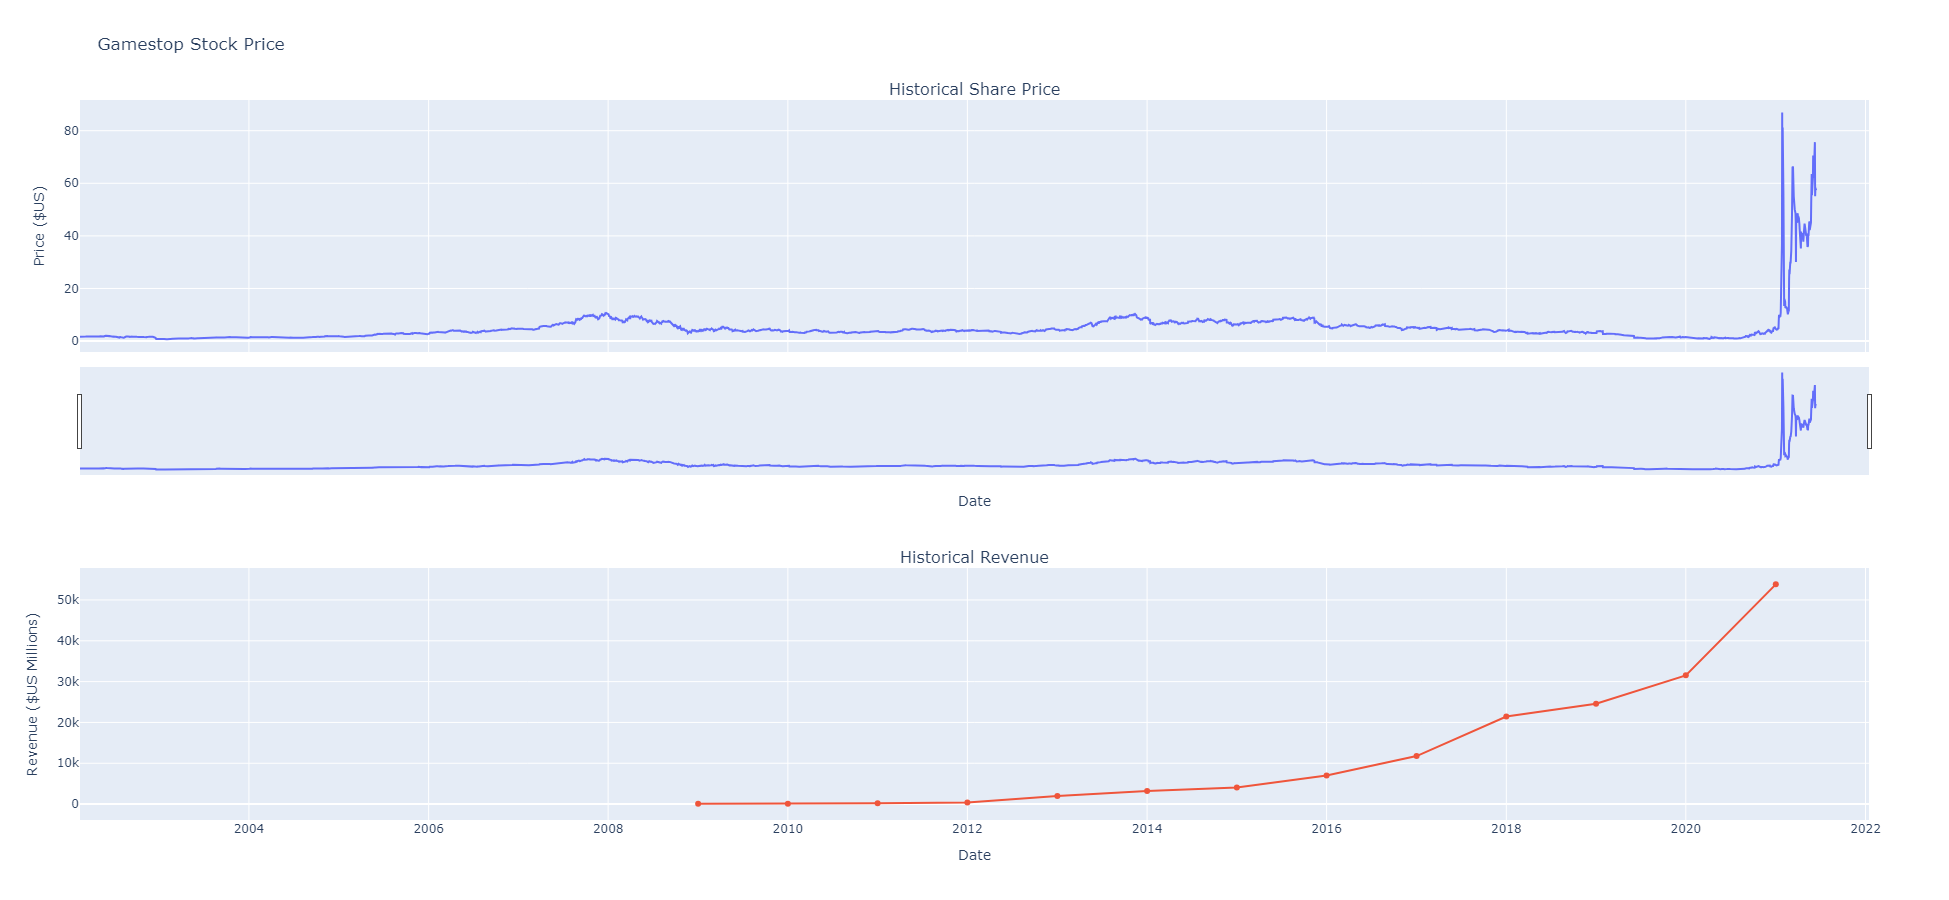

In [87]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
